In [50]:
import matplotlib.pyplot as plt
import numpy  # numpy is used to make some operrations with arrays more easily
import pandas as pd
import numpy as np

In [51]:
# Importing the dataset
df = pd.read_csv('../HousingData.csv')

In [52]:
list(df.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

Test Random Data

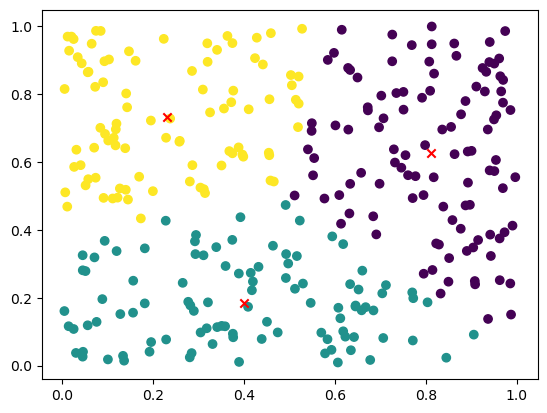

In [53]:

class KMeansClustering:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))

    def fit(self, X, max_iterations=100):
        y = np.zeros(X.shape[0], dtype=int)  # Initialize labels
        self.centroids = np.random.uniform(
            np.amin(X, axis=0), np.amax(X, axis=0), (self.k, X.shape[1])
        )

        for _ in range(max_iterations):
            prev_centroids = np.copy(self.centroids)
            y = []

            for data_point in X:
                distances = KMeansClustering.distance(data_point, self.centroids)
                cluster_number = np.argmin(distances)
                y.append(cluster_number)

            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])

                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])

            self.centroids = np.array(cluster_centers)

            if np.max(np.abs(prev_centroids - self.centroids)) < 0.0001:
                break
        
        return y

# Generate random data
np.random.seed(42)
random_points = np.random.rand(300, 2)

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c="red", marker="x")

plt.show()


In [54]:
df2 = pd.read_csv('/Users/sergiogonzalez/Documents/GitHub/IA-TEC/Uresti/Modulo2/spotify-2023.csv', encoding='ISO-8859-1')
df2

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [55]:
list(df2.columns)

['track_name',
 'artist(s)_name',
 'artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'key',
 'mode',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

In [56]:
df2.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

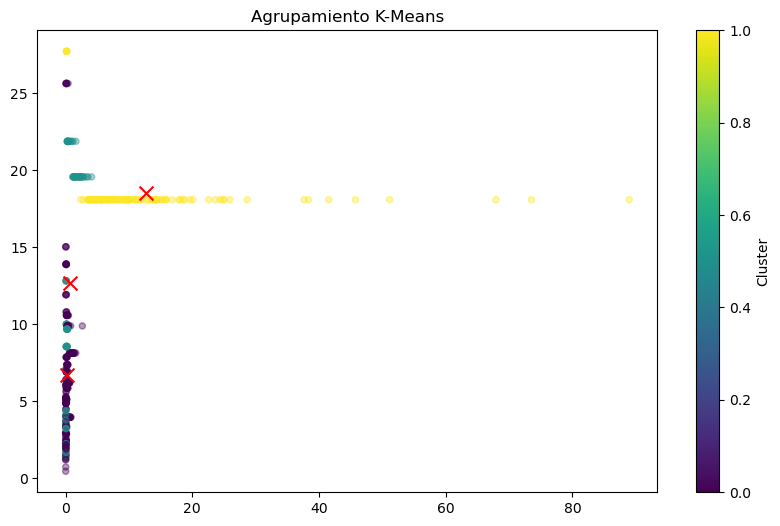

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans(dataset, k, max_iters=100):
    num_samples, num_features = dataset.shape
    
    # Inicialización aleatoria de los centroides
    centroids = dataset[np.random.choice(num_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Asignar cada punto al centroide más cercano
        distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Actualizar los centroides basados en la asignación
        new_centroids = np.array([dataset[labels == i].mean(axis=0) for i in range(k)])
        
        # Comprobar si los centroides han convergido
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Cargar el dataset desde un archivo CSV usando pandas
df = pd.read_csv("HousingData.csv")

# Seleccionar las columnas que se usarán para el clustering
selected_columns = ['CRIM', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


# Convertir las columnas a tipos numéricos
numeric_df = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos después de la conversión
numeric_df = numeric_df.dropna()

# Obtener los datos del DataFrame
data = numeric_df.values

# Número de clusters (k)
num_clusters = 3

# Ejecutar el algoritmo K-Means
centroids, labels = kmeans(data, num_clusters)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.4, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x", s=100)
plt.title('Agrupamiento K-Means')
plt.colorbar(label='Cluster')
plt.show()


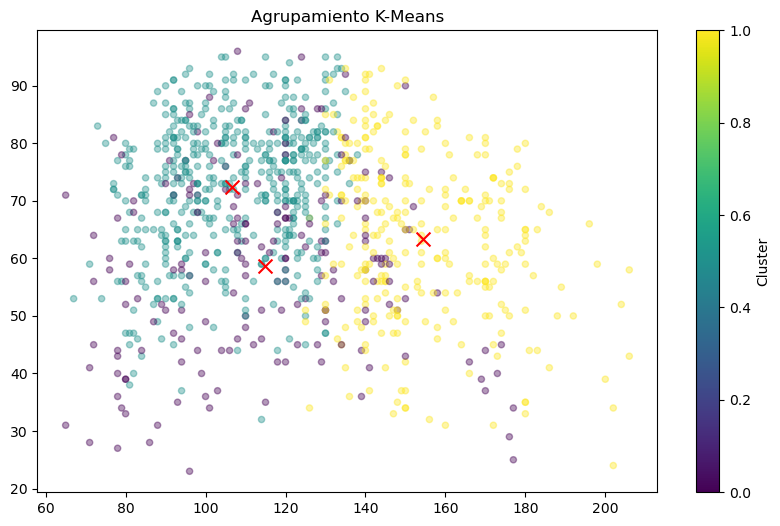

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans(dataset, k, max_iters=100):
    num_samples, num_features = dataset.shape
    
    # Inicialización aleatoria de los centroides
    centroids = dataset[np.random.choice(num_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Asignar cada punto al centroide más cercano
        distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Actualizar los centroides basados en la asignación
        new_centroids = np.array([dataset[labels == i].mean(axis=0) for i in range(k)])
        
        # Comprobar si los centroides han convergido
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Cargar el dataset desde un archivo CSV usando pandas
csv_file = '/Users/sergiogonzalez/Documents/GitHub/IA-TEC/Uresti/Modulo2/spotify-2023.csv'
df = pd.read_csv(csv_file, encoding='ISO-8859-1')


# Seleccionar las columnas que se usarán para el clustering


selected_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                   'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Convertir las columnas a tipos numéricos
numeric_df = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos después de la conversión
numeric_df = numeric_df.dropna()

# Obtener los datos del DataFrame
data = numeric_df.values

# Número de clusters (k)
num_clusters = 3

# Ejecutar el algoritmo K-Means
centroids, labels = kmeans(data, num_clusters)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.4, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x", s=100)
plt.title('Agrupamiento K-Means')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Leer el archivo CSV en un DataFrame
# df = pd.read_csv("HousingData.csv")
# df = pd.read_csv("HousingData.csv")
df = pd.read_csv('/Users/sergiogonzalez/Documents/GitHub/IA-TEC/Uresti/Modulo2/spotify-2023.csv', encoding='ISO-8859-1')

class KMeansClustering:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def distancia(punto_datos, centroides):
        return np.sqrt(np.sum((centroides - punto_datos) ** 2, axis=1))

    def ajustar(self, X, max_iteraciones=100):
        y = np.zeros(X.shape[0], dtype=int)  # Inicializar etiquetas
        
        # Normalización manual
        X_normalizado = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        
        self.centroids = np.random.uniform(0, 1, (self.k, X_normalizado.shape[1]))

        for _ in range(max_iteraciones):
            centroides_previos = np.copy(self.centroids)
            y = []

            for punto_datos in X_normalizado:
                distancias = KMeansClustering.distancia(punto_datos, self.centroids)
                numero_cluster = np.argmin(distancias)
                y.append(numero_cluster)

            y = np.array(y)

            indices_clusters = []

            for i in range(self.k):
                indices_clusters.append(np.argwhere(y == i))

            centroides_clusters = []

            for i, indices in enumerate(indices_clusters):
                if len(indices) == 0:
                    centroides_clusters.append(self.centroids[i])
                else:
                    centroides_clusters.append(np.mean(X_normalizado[indices], axis=0)[0])

            self.centroids = np.array(centroides_clusters)

            if np.max(np.abs(centroides_previos - self.centroids)) < 0.0001:
                break
        
        return y

# Lista de nombres de columna para características
# columnas_datos = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

columnas_datos = ['artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

for col in columnas_datos:
    unique_values = np.unique(X[:, columnas_datos.index(col)])
    mapping = {val: i for i, val in enumerate(unique_values)}
    X[:, columnas_datos.index(col)] = [mapping[val] for val in X[:, columnas_datos.index(col)]]


# Extraer columnas relevantes del DataFrame
X = df[columnas_datos].values


# Agrupamiento K-Means
kmeans = KMeansClustering(k=4)
etiquetas = kmeans.ajustar(X)

# Imprimir asignaciones de clusters para cada punto de datos
for i, etiqueta in enumerate(etiquetas):
    print(f"Punto de datos {i}: Cluster {etiqueta}")

# Imprimir centroides finales de los clusters
print("Centroides Finales de los Clusters:")
print(kmeans.centroids)

# Visualización

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', alpha=0.4, s=20)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c="red", marker="x", s=100)
plt.title('Agrupamiento K-Means')
plt.colorbar(label='Cluster')
plt.show()